In [ ]:
from imutils.video import count_frames

In [ ]:
import json
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Coding/matrix1.mp4"
override = False


total = count_frames(path, override=override)
print("[INFO] {} total frames read from {}".format(total,path))

[INFO] 4832 total frames read from /content/drive/My Drive/Coding/f1.mp4


In [ ]:
avgs = []
read = 0
skip = 25
output = "/content/drive/My Drive/Coding/output/f1.json"

print("[INFO] looping over frames in video")
video = cv2.VideoCapture(path)

# loop over the frames of the video
while True:
	# grab the current frame
	(grabbed, frame) = video.read()
 
	# check to see if we have reached the end of the
	# video
	if not grabbed:
		break
	# increment the total number of frames read
	read += 1
	# check to see if we should compute the average RGB value
	# of the current frame
	if skip == 0 or read % skip == 0:
		avg = cv2.mean(frame)[:3]
		avgs.append(avg)
# release the video pointer
video.release()

# dump the frame averages to file
print("[INFO] saving frame averages...")
f = open(output, "w")
f.write(json.dumps(avgs))
f.close()
print("[INFO] {:,} total frame averages saved".format(len(avgs)))

[INFO] looping over frames in video
[INFO] saving frame averages...
[INFO] 193 total frame averages saved


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

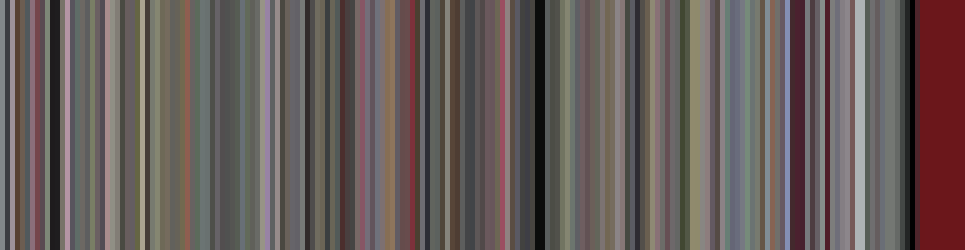

-1

In [ ]:
img = "/content/drive/My Drive/Coding/output/f1.png"
width = 5
height = 250


# load the averages file and convert it to a NumPy array
avgs = json.loads(open(output).read())
avgs = np.array(avgs, dtype="int")
# grab the individual bar width and allocate memory for
# the barcode visualization
bw = width
barcode = np.zeros((height, len(avgs)*bw, 3), dtype='uint8')
# loop over the averages and create a single 'bar' for
# each frame average in the list
for (i, avg) in enumerate(avgs):
  start = (i*bw,0)
  end = (i*bw+bw, height)
  cv2.rectangle(barcode, start, end, avg.astype("uint8").tolist(), -1)
# write the video barcode visualization to file and then
# display it to our screen
cv2.imwrite(img, barcode)
cv2_imshow(barcode)

In [ ]:
drive.flush_and_unmount()